In [1]:
import pandas as pd
import numpy as np

In [2]:
#read the csv file into the DataFrame
df = pd.read_csv("sales-data (1).csv")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Sales,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Account   17 non-null     int64 
 1   Name      17 non-null     object
 2   Rep       17 non-null     object
 3   Manager   17 non-null     object
 4   Product   17 non-null     object
 5   Quantity  17 non-null     int64 
 6   Sales     17 non-null     int64 
 7   Status    17 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.2+ KB


In [4]:
pd.pivot_table(df,index=['Product'],values=['Quantity','Sales'],aggfunc=['sum'])

sum        
            Quantity   Sales
Product                     
CPU               17  465000
Maintenance        8   22000
Monitor            2    5000
Software           3   30000

In [5]:
pd.pivot_table(df,index=['Name','Rep','Manager','Product'],values=['Quantity','Sales'],aggfunc=['sum'])

sum  \
                                                                     Quantity   
Name                         Rep           Manager       Product                
Barton LLC                   John Smith    Debra Henley  CPU                1   
Fritsch, Russel and Anderson Craig Booker  Debra Henley  CPU                1   
Herman LLC                   Cedric Moss   Fred Anderson CPU                2   
Jerde-Hilpert                John Smith    Debra Henley  Maintenance        2   
Kassulke, Ondricka and Metz  Wendy Yule    Fred Anderson Maintenance        3   
Keeling LLC                  Wendy Yule    Fred Anderson CPU                5   
Kiehn-Spinka                 Daniel Hilton Debra Henley  CPU                2   
Koepp Ltd                    Wendy Yule    Fred Anderson CPU                2   
                                                         Monitor            2   
Kulas Inc                    Daniel Hilton Debra Henley  CPU                2   
                                                         Software           1   
Purdy-Kunde                  Cedric Moss   Fred Anderson CPU                1   
Stokes LLC                   Cedric Moss   Fred Anderson Maintenance        1   
                                                         Software           1   
Trantow-Barrows              Craig Booker  Debra Henley  CPU                1   
                                                         Maintenance        2   
                                                         Software           1   

                                                                              
                                                                       Sales  
Name                         Rep           Manager       Product              
Barton LLC                   John Smith    Debra Henley  CPU           35000  
Fritsch, Russel and Anderson Craig Booker  Debra Henley  CPU           35000  
Herman LLC                   Cedric Moss   Fred Anderson CPU           65000  
Jerde-Hilpert                John Smith    Debra Henley  Maintenance    5000  
Kassulke, Ondricka and Metz  Wendy Yule    Fred Anderson Maintenance    7000  
Keeling LLC                  Wendy Yule    Fred Anderson CPU          100000  
Kiehn-Spinka                 Daniel Hilton Debra Henley  CPU           65000  
Koepp Ltd                    Wendy Yule    Fred Anderson CPU           65000  
                                                         Monitor        5000  
Kulas Inc                    Daniel Hilton Debra Henley  CPU           40000  
                                                         Software      10000  
Purdy-Kunde                  Cedric Moss   Fred Anderson CPU           30000  
Stokes LLC                   Cedric Moss   Fred Anderson Maintenance    5000  
                                                         Software      10000  
Trantow-Barrows              Craig Booker  Debra Henley  CPU           30000  
                                                         Maintenance    5000  
                                                         Software      10000

In [6]:
df['Rep'].value_counts()

Rep
Craig Booker     4
Cedric Moss      4
Wendy Yule       4
Daniel Hilton    3
John Smith       2
Name: count, dtype: int64

In [7]:
pd.pivot_table(df,index=['Manager','Rep'],columns=['Product'],values=['Sales'],aggfunc=['sum'])

sum                             
                                Sales                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [8]:
#filling the null values with 0
pd.pivot_table(df,index=['Manager','Rep'],columns=['Product'],values=['Sales'],aggfunc=['sum'],fill_value=0)

sum                             
                              Sales                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [9]:
pd.pivot_table(df,index=['Manager','Rep'],columns=['Product'],values=['Sales','Quantity'],aggfunc=['sum'],fill_value=0)

sum                                       \
                            Quantity                                Sales   
Product                          CPU Maintenance Monitor Software     CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker         2           2       0        1   65000   
              Daniel Hilton        4           0       0        1  105000   
              John Smith           1           2       0        0   35000   
Fred Anderson Cedric Moss          3           1       0        1   95000   
              Wendy Yule           7           3       2        0  165000   

                                                          
                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker         5000       0    10000  
              Daniel Hilton           0       0    10000  
              John Smith           5000       0        0  
Fred Anderson Cedric Moss          5000       0    10000  
              Wendy Yule           7000    5000        0

In [10]:
pd.pivot_table(df,index=['Manager','Rep','Product'],values=['Sales','Quantity'],aggfunc=['sum'],fill_value=0)

sum        
                                        Quantity   Sales
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU                2   65000
                            Maintenance        2    5000
                            Software           1   10000
              Daniel Hilton CPU                4  105000
                            Software           1   10000
              John Smith    CPU                1   35000
                            Maintenance        2    5000
Fred Anderson Cedric Moss   CPU                3   95000
                            Maintenance        1    5000
                            Software           1   10000
              Wendy Yule    CPU                7  165000
                            Maintenance        3    7000
                            Monitor            2    5000

In [11]:
#margins=True -> the total will be provided
pd.pivot_table(df,index=['Manager','Rep','Product'],values=['Sales','Quantity'],aggfunc=['sum'],fill_value=0, margins=True)

sum        
                                        Quantity   Sales
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU                2   65000
                            Maintenance        2    5000
                            Software           1   10000
              Daniel Hilton CPU                4  105000
                            Software           1   10000
              John Smith    CPU                1   35000
                            Maintenance        2    5000
Fred Anderson Cedric Moss   CPU                3   95000
                            Maintenance        1    5000
                            Software           1   10000
              Wendy Yule    CPU                7  165000
                            Maintenance        3    7000
                            Monitor            2    5000
All                                           30  522000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Account   17 non-null     int64 
 1   Name      17 non-null     object
 2   Rep       17 non-null     object
 3   Manager   17 non-null     object
 4   Product   17 non-null     object
 5   Quantity  17 non-null     int64 
 6   Sales     17 non-null     int64 
 7   Status    17 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.2+ KB


In [13]:
df['Status'].value_counts()

Status
presented    6
pending      4
won          4
declined     3
Name: count, dtype: int64

In [14]:
pd.pivot_table(df, index=['Manager','Status'],values=['Sales'],aggfunc=['sum'],fill_value=0, margins=True)

sum
                          Sales
Manager       Status           
Debra Henley  declined    70000
              pending     50000
              presented   50000
              won         65000
Fred Anderson declined    65000
              pending      5000
              presented   45000
              won        172000
All                      522000

In [15]:
#Advanced pivot table filtering
#table.query(condition) -> acc to what details the data should be fetched
table=pd.pivot_table(df, index=['Manager','Status'],values=['Sales'],aggfunc=['sum'],fill_value=0, margins=True)
table.query("Manager==['Fred Anderson'] & Status==['won','presented']")

sum
                          Sales
Manager       Status           
Fred Anderson presented   45000
              won        172000

In [16]:
round(pd.pivot_table(df, index=['Manager','Status'],columns=['Product'],values=['Sales'],aggfunc=['sum','min'],fill_value=0, margins=True),2)

sum                                         min  \
                          Sales                                       Sales   
Product                     CPU Maintenance Monitor Software     All    CPU   
Manager       Status                                                          
Debra Henley  declined    70000           0       0        0   70000  35000   
              pending     40000       10000       0        0   50000  40000   
              presented   30000           0       0    20000   50000  30000   
              won         65000           0       0        0   65000  65000   
Fred Anderson declined    65000           0       0        0   65000  65000   
              pending         0        5000       0        0    5000      0   
              presented   30000           0    5000    10000   45000  30000   
              won        165000        7000       0        0  172000  65000   
All                      465000       22000    5000    30000  522000  30000   

                                                             
                                                             
Product                 Maintenance Monitor Software    All  
Manager       Status                                         
Debra Henley  declined            0       0        0  35000  
              pending          5000       0        0   5000  
              presented           0       0    10000  10000  
              won                 0       0        0  65000  
Fred Anderson declined            0       0        0  65000  
              pending          5000       0        0   5000  
              presented           0    5000    10000   5000  
              won              7000       0        0   7000  
All                            5000    5000    10000   5000

In [17]:
# Create a pivot table to summarize total sales for each product category
category_sales = df.pivot_table(index='Product', values='Sales', aggfunc='sum')

# Display the pivot table
print(category_sales)

              Sales
Product            
CPU          465000
Maintenance   22000
Monitor        5000
Software      30000


ValueError: x must be 1D

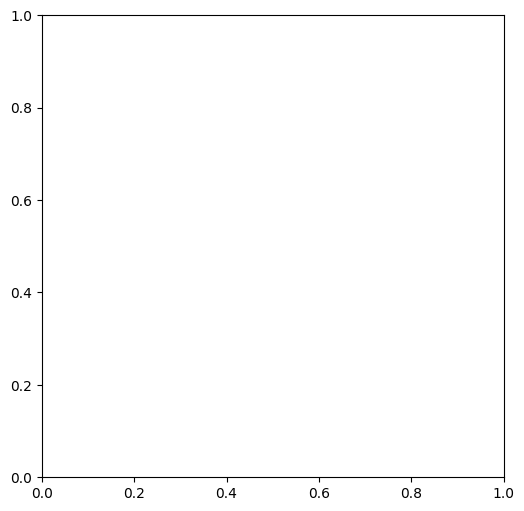

In [18]:
import matplotlib.pyplot as plt

# Plotting a pie chart for total sales by product category
plt.figure(figsize=(8, 6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [ ]:
# Plotting a bar chart for total sales by product category
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', rot=45, legend=None)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Category')
plt.tight_layout()
plt.show()

In [ ]:
product_status_sales = df.pivot_table(index='Product', columns='Status', values='Sales', aggfunc='sum', fill_value=0)

# Calculate total sales for each product
product_total_sales = product_status_sales.sum(axis=1)

# Plotting a grouped bar chart for total sales by product and status
plt.figure(figsize=(12, 8))
product_status_sales.plot(kind='bar', stacked=True)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product and Status')
plt.legend(title='Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Resetting index to have 'Product' as a column for better visualization
product_status_sales = product_status_sales.reset_index()

# Plotting a grouped bar chart for total sales by product and status (not stacked)
plt.figure(figsize=(12, 8))

# Get the number of products
num_products = len(product_status_sales)

# Define the width for each group of bars
bar_width = 0.2

for i, status in enumerate(product_status_sales.columns[1:]):  # Skip 'Product' column
    # Calculate the position of each bar
    positions = range(num_products)
    bar_positions = [pos + i * bar_width for pos in positions]

    # Plot the bars for each status
    plt.bar(bar_positions, product_status_sales[status], width=bar_width, label=status)

# Set x-axis labels and ticks
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product and Status')
plt.xticks([p + 0.3 for p in positions], product_status_sales['Product'], rotation=45)
plt.legend(title='Status')
plt.tight_layout()
plt.show()


NameError: name 'product_status_sales' is not defined